### Import Dependencies

In [7]:
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn import svm
import numpy as np
from nltk.corpus import stopwords
import nltk
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [8]:
#variable parameter

percent = 0.5

In [3]:
# Determines the cluster label for the unsupervised kmeans: maps groundtruth to prediction

def cluster_label(GtLabel,pred):
    
    label1 = pred
    label0 = 1-pred
    cluster_pred = pred
    
    acc1 = accuracy_score(GtLabel, label1)
    acc0 = accuracy_score(GtLabel, label0)
    
    if acc0 > acc1:
        cluster_pred = label0 
        
    return cluster_pred 

In [4]:
# Function to read emails from files

def read_emails_from_folder(folder_path):
    emails = []
    for filename in os.listdir(folder_path):
        with open(os.path.join(folder_path, filename), 'r', encoding='utf-8', errors='ignore') as file:
            email_text = file.read()
            emails.append(email_text)
    return emails

In [5]:
# Define paths to data folders
spam_training_folder = 'spamtraining'
ham_training_folder = 'hamtraining'
spam_testing_folder = 'spamtesting'
ham_testing_folder = 'hamtesting'

In [6]:
# Load data
spam_testing_emails = read_emails_from_folder(spam_testing_folder)
ham_testing_emails = read_emails_from_folder(ham_testing_folder)

spam_training_emails = read_emails_from_folder(spam_training_folder)
ham_training_emails = read_emails_from_folder(ham_training_folder)

# Combine spam and ham emails
all_testing_emails = spam_testing_emails + ham_testing_emails

# build the labels: 1 for spam and 0 for ham
y_Test = np.array([1] * len(spam_testing_emails) + [0] * len(ham_testing_emails))

print("Number of spam_testing emails = ", len(spam_testing_emails))
print("Number of ham_testing emails = ", len(ham_testing_emails))

print("Number of spam_training_emails = ", len(spam_training_emails))
print("Number of ham_training_emails = ", len(ham_training_emails))

y_Test

Number of spam_testing emails =  100
Number of ham_testing emails =  100
Number of spam_training_emails =  100
Number of ham_training_emails =  100


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [7]:
# Combine spam and ham emails for the training data
all_training_emails = spam_training_emails + ham_training_emails

# build the labels: 1 for spam and 0 for ham
y_Train = np.array([1] * len(spam_training_emails) + [0] * len(ham_training_emails))
y_Train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [8]:
# Convert the training data to a matrix

vect_train = CountVectorizer()
bow_train = vect_train.fit_transform(all_training_emails)
total_features_train = len(vect_train.vocabulary_)
print("Total number of features (vocabularies) = ", total_features_train)

Total number of features (vocabularies) =  6963


In [9]:
#select top max_features

vectorizer_train = CountVectorizer( max_features=int(total_features_train * percent))
model_train = vectorizer_train.fit_transform(all_training_emails)
dataVec_train = model_train.toarray()
Vocab = vectorizer_train.vocabulary_
print(dataVec_train.shape[1])

3481


In [10]:
#select the vocabulary seen during training for the testing data

vectorizer_test = CountVectorizer( vocabulary=Vocab)
model = vectorizer_test.fit_transform(all_testing_emails)
dataVec_test = model.toarray()
print(dataVec_test.shape[1])

3481


In [11]:
#count the number of vocabularies in the testing data

vect = CountVectorizer()
bow = vect.fit_transform(all_testing_emails)
total_features = len(vect.vocabulary_)
print("Total number of features (vocabularies) = ", total_features)

Total number of features (vocabularies) =  7369


# **SVM**

In [12]:
clf = svm.SVC()
clf.fit(dataVec_train, y_Train)

SVC()

In [13]:
GtLabel = y_Test

In [14]:
print(clf.predict(dataVec_test))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0
 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0
 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0]


In [15]:
Final_Pred_svm = clf.predict(dataVec_test)

In [16]:
Precision_svm = precision_score(GtLabel, Final_Pred_svm, average='binary')
Recall_score_svm = recall_score(GtLabel, Final_Pred_svm, average='binary')
F1_score_svm = f1_score(GtLabel, Final_Pred_svm, average='binary')
Accuracy_svm = accuracy_score(GtLabel, Final_Pred_svm)

In [17]:
print("Precision =", Precision_svm)
print("Recall_score =", Recall_score_svm)
print("F1_score =", F1_score_svm)
print("Accuracy =", Accuracy_svm )

Precision = 0.6410256410256411
Recall_score = 1.0
F1_score = 0.78125
Accuracy = 0.72


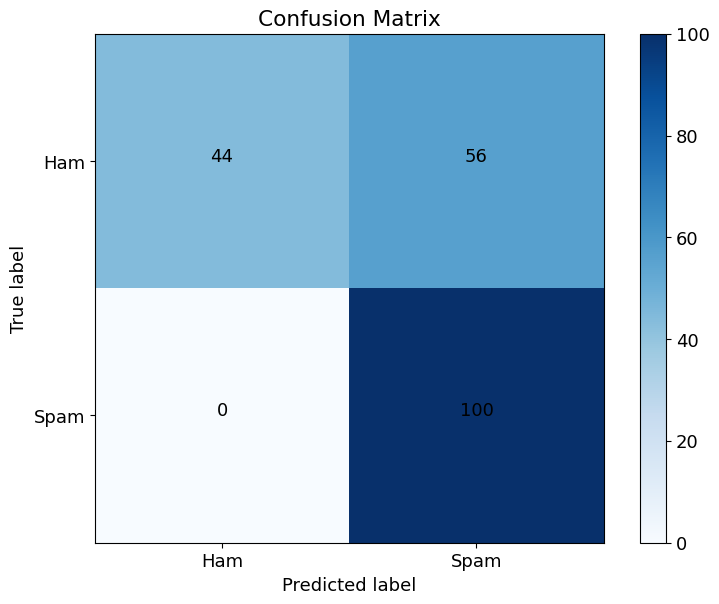

In [18]:
# confusion matrix

# Create confusion matrix
cm = confusion_matrix(GtLabel, Final_Pred_svm)

# Define class labels
classes = ['Ham', 'Spam']

plt.rcParams.update({'font.size': 13})

fig = plt.figure(figsize=(8, 6))

# Plot confusion matrix with annotations
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 1.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# **Kmeans**

In [19]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(dataVec_test)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1], dtype=int32)

In [20]:
GtLabel = y_Test # groundtruth
pred = kmeans.labels_

Final_Pred_kmeans = cluster_label(GtLabel,pred)

In [21]:
Precision_kmeans = precision_score(GtLabel, Final_Pred_kmeans, average='binary')
Recall_score_kmeans = recall_score(GtLabel, Final_Pred_kmeans, average='binary')
F1_score_kmeans = f1_score(GtLabel, Final_Pred_kmeans, average='binary')
Accuracy_kmeans = accuracy_score(GtLabel, Final_Pred_kmeans)

In [22]:
print("Precision =", Precision_kmeans)
print("Recall_score =", Recall_score_kmeans)
print("F1_score =", F1_score_kmeans)
print("Accuracy =", Accuracy_kmeans)
    

Precision = 0.5195530726256983
Recall_score = 0.93
F1_score = 0.6666666666666666
Accuracy = 0.535


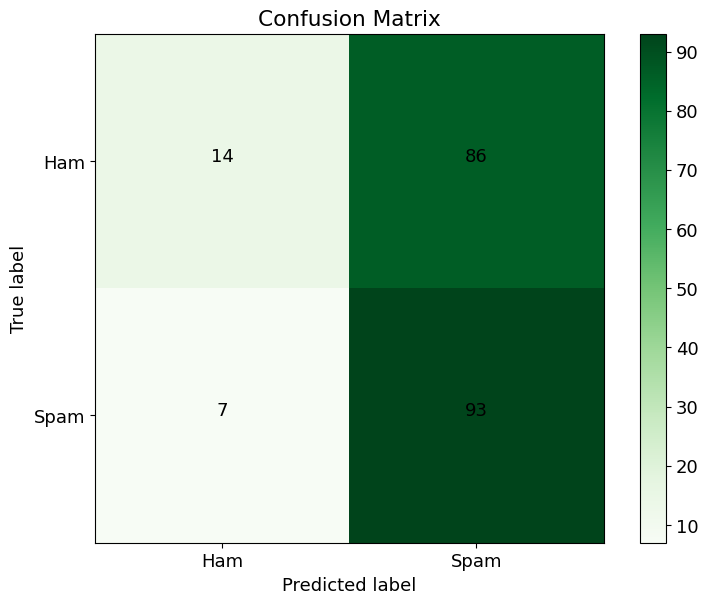

In [23]:
# confusion matrix

# Create confusion matrix
cm = confusion_matrix(GtLabel, Final_Pred_kmeans)

# Define class labels
classes = ['Ham', 'Spam']

plt.rcParams.update({'font.size': 13})

fig = plt.figure(figsize=(8, 6))

# Plot confusion matrix with annotations
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 1.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Visualization: Comparing the Performance of SVM and K-Means 

<Figure size 1500x1500 with 0 Axes>

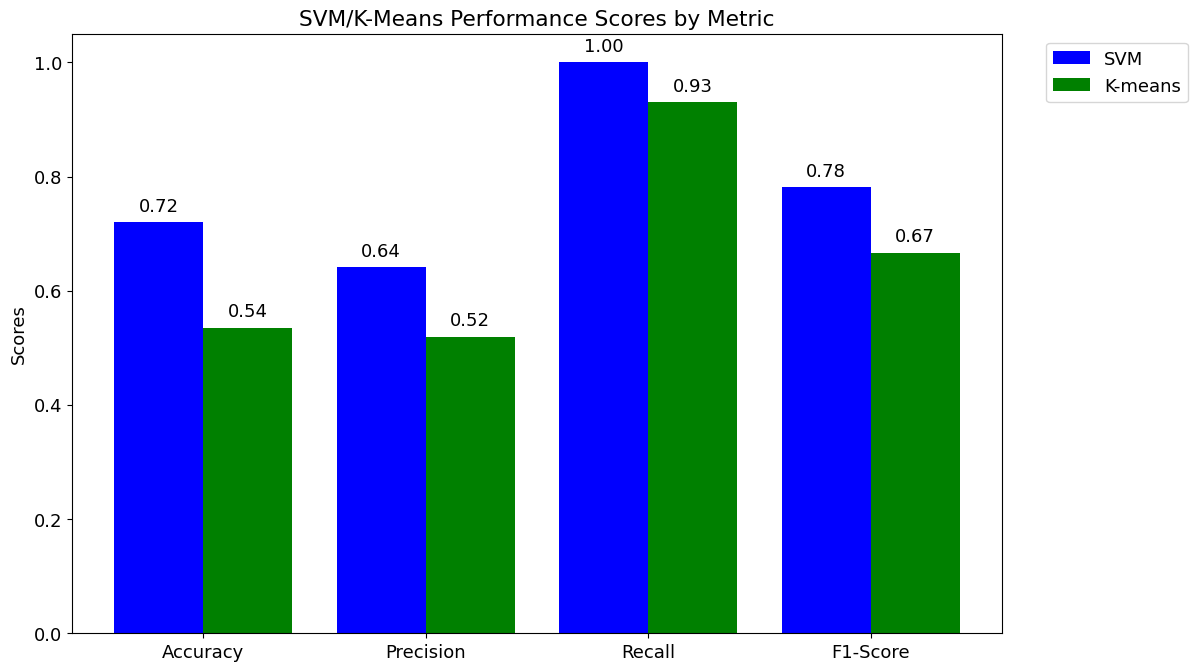

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for two classifiers
classifier1_scores = {
    'Accuracy': Accuracy_svm,
    'Precision': Precision_svm,
    'Recall': Recall_score_svm,
    'F1-Score': F1_score_svm
}

classifier2_scores = {
    'Accuracy': Accuracy_kmeans ,
    'Precision': Precision_kmeans,
    'Recall': Recall_score_kmeans,
    'F1-Score': F1_score_kmeans
}

# Extract metric names and scores
metrics = list(classifier1_scores.keys())
classifier1_values = list(classifier1_scores.values())
classifier2_values = list(classifier2_scores.values())

fig = plt.figure(figsize=(15, 15))
plt.rcParams.update({'font.size': 13})

# Plotting histograms
x = np.arange(len(metrics))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 5.5))
fig.subplots_adjust(top=1.2)
bars1 = ax.bar(x - width/2, classifier1_values, width, label='SVM', color='blue')
bars2 = ax.bar(x + width/2, classifier2_values, width, label='K-means',color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('SVM/K-Means Performance Scores by Metric')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='upper right',bbox_to_anchor=(1.21, 1))

# Add text labels above each bar displaying the score
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                 (bar.get_x() + bar.get_width() / 2, height),
                 textcoords="offset points",         
                 xytext=(0,5),
                 ha='center',      
                 va='bottom')

plt.grid(False)
plt.show()